# KB Mirrors

This example simulates the alignment of a KB mirror endstation (with four degrees of freedom).

In [1]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [2]:
from blop.sim import Beamline

beamline = Beamline(name="bl")

In [3]:
from blop import DOF, Agent, Objective
from blop.digestion import beam_stats_digestion

dofs = [
    DOF(description="KBV downstream", device=beamline.kbv_dsv, search_domain=(-5.0, 5.0)),
    DOF(description="KBV upstream", device=beamline.kbv_usv, search_domain=(-5.0, 5.0)),
    DOF(description="KBH downstream", device=beamline.kbh_dsh, search_domain=(-5.0, 5.0)),
    DOF(description="KBH upstream", device=beamline.kbh_ush, search_domain=(-5.0, 5.0)),
]

objectives = [
    Objective(name="bl_det_sum", target="max", transform="log", trust_domain=(200, np.inf)),
    Objective(name="bl_det_wid_x", target="min", transform="log", latent_groups=[("bl_kbh_dsh", "bl_kbh_ush")]),
    Objective(name="bl_det_wid_y", target="min", transform="log", latent_groups=[("bl_kbv_dsv", "bl_kbv_usv")]),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

(uid,) = RE(agent.learn("qr", n=32))

2025-03-04 21:33:37.728 INFO: Executing plan <generator object Agent.learn at 0x7f04c0f05b60>


2025-03-04 21:33:37.730 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f04c220b5e0> from 'idle' -> 'running'


2025-03-04 21:33:37.732 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-03-04 21:33:37

Persistent Unique Scan ID: '16cc7367-e473-493d-947c-1526e87b2b6e'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:33:37.8 |     -1.516 |     -1.307 |      0.542 |      2.081 |    457.482 |      229.885 |      152.435 |       44.815 |       92.009 |

|         2 | 21:33:37.8 |     -3.560 |     -2.158 |     -0.891 |      4.049 |     88.306 |      281.930 |      159.993 |       30.202 |      112.582 |

|         3 | 21:33:37.9 |     -0.762 |     -2.773 |     -2.052 |      3.541 |     18.754 |      297.487 |      125.283 |        4.406 |       89.267 |

|         4 | 21:33:38.0 |      0.441 |     -2.924 |     -4.604 |      2.352 |     36.421 |      291.598 |      110.604 |       13.262 |       63.393 |

|         5 | 21:33:38.0 |      2.654 |     -2.309 |     -3.419 |      0.048 |    197.715 |      251.523 |       83.990 |       84.685 |       17.748 |

|         6 | 21:33:38.1 |     -0.134 |     -0.005 |     -4.251 |     -0.470 |    294.652 |      246.561 |      150.745 |       94.030 |       42.214 |

|         7 | 21:33:38.1 |     -2.961 |     -4.448 |     -3.067 |     -1.915 |     40.188 |      225.681 |      139.134 |      107.399 |      114.607 |

|         8 | 21:33:38.2 |     -4.313 |     -3.153 |      1.864 |      0.324 |     51.254 |      168.128 |      151.036 |       34.604 |      129.477 |

|         9 | 21:33:38.3 |     -2.115 |     -4.049 |      3.347 |     -3.903 |      3.094 |      221.573 |      139.417 |      275.031 |      226.267 |

|        10 | 21:33:38.3 |     -4.942 |     -0.876 |      4.684 |     -3.707 |      1.728 |      200.304 |      142.059 |      386.691 |      253.856 |

|        11 | 21:33:38.4 |     -3.379 |      4.941 |      2.231 |     -4.811 |      4.007 |      210.475 |      151.569 |      333.991 |      264.258 |

|        12 | 21:33:38.4 |     -1.177 |      0.615 |      1.066 |     -2.741 |    402.878 |      131.167 |      175.642 |       56.932 |       51.172 |

|        13 | 21:33:38.5 |      0.271 |      0.141 |      3.518 |     -1.278 |    324.230 |      111.661 |      147.000 |       22.334 |       32.420 |

|        14 | 21:33:38.5 |      3.058 |      4.467 |      4.698 |     -1.161 |    114.207 |      110.837 |      167.699 |       21.019 |       95.433 |

|        15 | 21:33:38.6 |      3.996 |     -1.027 |      2.138 |     -2.206 |    230.936 |      114.862 |       79.971 |       27.399 |       10.562 |

|        16 | 21:33:38.7 |      4.634 |     -3.616 |      4.333 |      4.330 |     -4.080 |      198.394 |      143.563 |      381.046 |      270.614 |

|        17 | 21:33:38.7 |      2.423 |     -1.771 |      2.997 |      3.275 |    340.255 |      205.518 |       88.231 |      132.711 |       24.422 |

|        18 | 21:33:38.8 |      1.833 |     -4.201 |      0.817 |     -0.214 |    187.606 |      178.440 |       91.382 |       19.169 |       30.916 |

|        19 | 21:33:38.8 |      3.243 |     -4.913 |     -0.619 |     -3.421 |      5.542 |      178.923 |      123.201 |      144.926 |       98.089 |

|        20 | 21:33:38.9 |      1.079 |     -0.470 |     -1.780 |     -4.164 |    312.922 |      175.096 |      125.957 |      136.424 |       28.547 |

|        21 | 21:33:38.9 |      4.806 |      0.852 |     -2.544 |     -4.466 |    105.373 |      183.598 |       99.923 |      148.467 |       44.725 |

|        22 | 21:33:39.0 |      2.017 |      3.909 |     -3.885 |     -3.100 |    112.099 |      207.655 |      178.632 |      160.871 |       68.746 |

|        23 | 21:33:39.1 |      1.378 |      1.360 |     -2.311 |      1.014 |    505.324 |      263.941 |      148.833 |       59.864 |       17.202 |

|        24 | 21:33:39.1 |      4.216 |      3.244 |     -0.994 |      1.444 |    417.327 |      247.562 |      135.468 |       21.820 |      104.217 |

|        25 | 21:33:39.2 |      3.697 |      2.052 |      1.254 |      2.933 |    433.707 |      233.167 |      124.712 |       83.459 |       72.021 |

|        26 | 21:33:39.2 |      0.860 |      2.706 |      0.088 |      4.613 |    290.966 |      266.456 |      176.572 |       58.295 |       32.119 |

|        27 | 21:33:39.3 |     -0.578 |      2.867 |      2.621 |      0.646 |    544.727 |      159.710 |      200.508 |       61.202 |       10.780 |

|        28 | 21:33:39.4 |     -2.751 |      2.212 |      3.801 |      1.779 |    217.965 |      162.369 |      209.229 |      110.553 |       26.146 |

|        29 | 21:33:39.4 |     -3.899 |      1.014 |     -0.018 |     -0.812 |    260.060 |      183.065 |      196.258 |       50.230 |       49.530 |

|        30 | 21:33:39.5 |     -1.696 |      4.071 |     -1.335 |     -1.632 |      0.169 |      188.186 |      149.882 |      344.328 |      247.649 |

|        31 | 21:33:39.5 |     -4.498 |      3.718 |     -3.444 |      2.594 |     -2.034 |      201.078 |      154.749 |      348.967 |      262.256 |

|        32 | 21:33:39.6 |     -2.325 |      1.832 |     -4.785 |      4.977 |      4.096 |      199.198 |      180.214 |      386.129 |      209.264 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['16cc7367'] (scan num: 1)

/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/fit.py:104: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL: 
  warn(


2025-03-04 21:33:42.104 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f04c220b5e0> from 'running' -> 'idle'


2025-03-04 21:33:42.105 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f04c0f05b60>


In [4]:
RE(agent.learn("qei", n=4, iterations=4))

2025-03-04 21:33:42.112 INFO: Executing plan <generator object Agent.learn at 0x7f04b99f9380>


2025-03-04 21:33:42.114 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f04c220b5e0> from 'idle' -> 'running'


2025-03-04 21:33:42.115 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-03-04 21:33:44

Persistent Unique Scan ID: 'e071d689-9ab8-4766-8b77-1c509f20df69'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:33:44.2 |      1.046 |      1.506 |      2.642 |     -0.435 |    548.798 |      137.538 |      155.971 |       35.546 |       13.946 |

|         2 | 21:33:44.2 |      1.882 |      1.041 |      2.185 |     -0.779 |    545.781 |      139.700 |      136.460 |       19.794 |       20.009 |

|         3 | 21:33:44.3 |      1.901 |      0.113 |      0.965 |     -0.231 |    557.636 |      175.262 |      122.061 |       17.862 |        8.743 |

|         4 | 21:33:44.3 |      2.769 |     -1.083 |     -0.057 |      1.178 |    545.230 |      223.545 |       91.427 |       16.473 |       11.100 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['e071d689'] (scan num: 2)

2025-03-04 21:33:45.336 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-03-04 21:33:49

Persistent Unique Scan ID: '3834b44f-a73c-482a-9429-02d311a915df'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:33:49.0 |      2.843 |     -0.375 |     -1.133 |      0.639 |    531.739 |      234.458 |      100.803 |       42.358 |       12.639 |

|         2 | 21:33:49.1 |      2.793 |     -0.673 |      1.681 |     -0.035 |    557.928 |      164.750 |       97.027 |       23.750 |        8.816 |

|         3 | 21:33:49.1 |      3.622 |     -2.567 |      1.051 |      1.140 |     -5.021 |      194.821 |      163.824 |      346.958 |      252.873 |

|         4 | 21:33:49.2 |      5.000 |     -2.345 |     -4.992 |      3.776 |      1.519 |      144.242 |      148.660 |      265.471 |      225.280 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['3834b44f'] (scan num: 3)

2025-03-04 21:33:49.938 INFO: running iteration 3 / 4




Transient Scan ID: 4     Time: 2025-03-04 21:33:52

Persistent Unique Scan ID: '32e843a3-ef6d-4046-acd5-6a819279ffd0'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:33:52.1 |      1.888 |     -1.441 |      0.696 |      0.209 |    538.130 |      189.371 |       99.320 |       16.726 |       31.859 |

|         2 | 21:33:52.1 |      1.905 |     -0.871 |      1.500 |     -0.199 |    546.389 |      165.079 |      107.500 |       18.626 |       21.181 |

|         3 | 21:33:52.2 |      1.470 |     -0.499 |      1.703 |     -0.714 |    548.131 |      150.599 |      119.520 |       16.493 |       21.786 |

|         4 | 21:33:52.2 |      2.863 |     -0.394 |      0.850 |     -0.942 |    544.307 |      163.250 |      100.403 |       33.067 |       12.906 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['32e843a3'] (scan num: 4)

2025-03-04 21:33:53.519 INFO: running iteration 4 / 4




Transient Scan ID: 5     Time: 2025-03-04 21:33:55

Persistent Unique Scan ID: '51978585-203c-45e9-989b-1586440ff4f2'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 21:33:55.1 |      2.026 |      0.118 |      2.923 |     -0.557 |    533.780 |      129.722 |      120.488 |       39.000 |        9.539 |

|         2 | 21:33:55.2 |      0.660 |      1.064 |      0.992 |      0.591 |    546.899 |      190.950 |      155.041 |       22.570 |       10.454 |

|         3 | 21:33:55.2 |      1.901 |      0.759 |     -1.910 |      2.728 |    467.427 |      290.195 |      132.000 |       15.141 |       15.633 |

|         4 | 21:33:55.3 |      1.186 |     -0.438 |     -2.192 |     -0.226 |    520.488 |      238.320 |      124.890 |       91.268 |       26.012 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['51978585'] (scan num: 5)

2025-03-04 21:33:56.237 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f04c220b5e0> from 'running' -> 'idle'


2025-03-04 21:33:56.239 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f04b99f9380>


('e071d689-9ab8-4766-8b77-1c509f20df69',
 '3834b44f-a73c-482a-9429-02d311a915df',
 '32e843a3-ef6d-4046-acd5-6a819279ffd0',
 '51978585-203c-45e9-989b-1586440ff4f2')

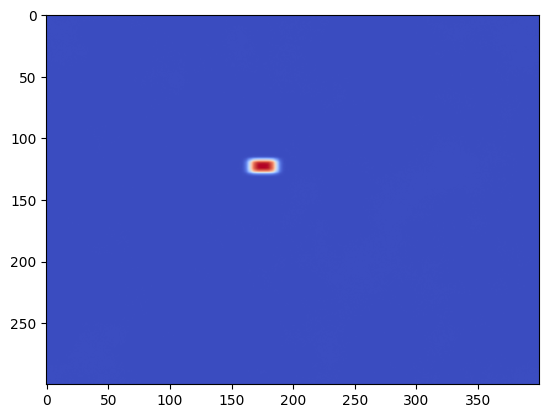

In [5]:
plt.imshow(agent.best.bl_det_image)

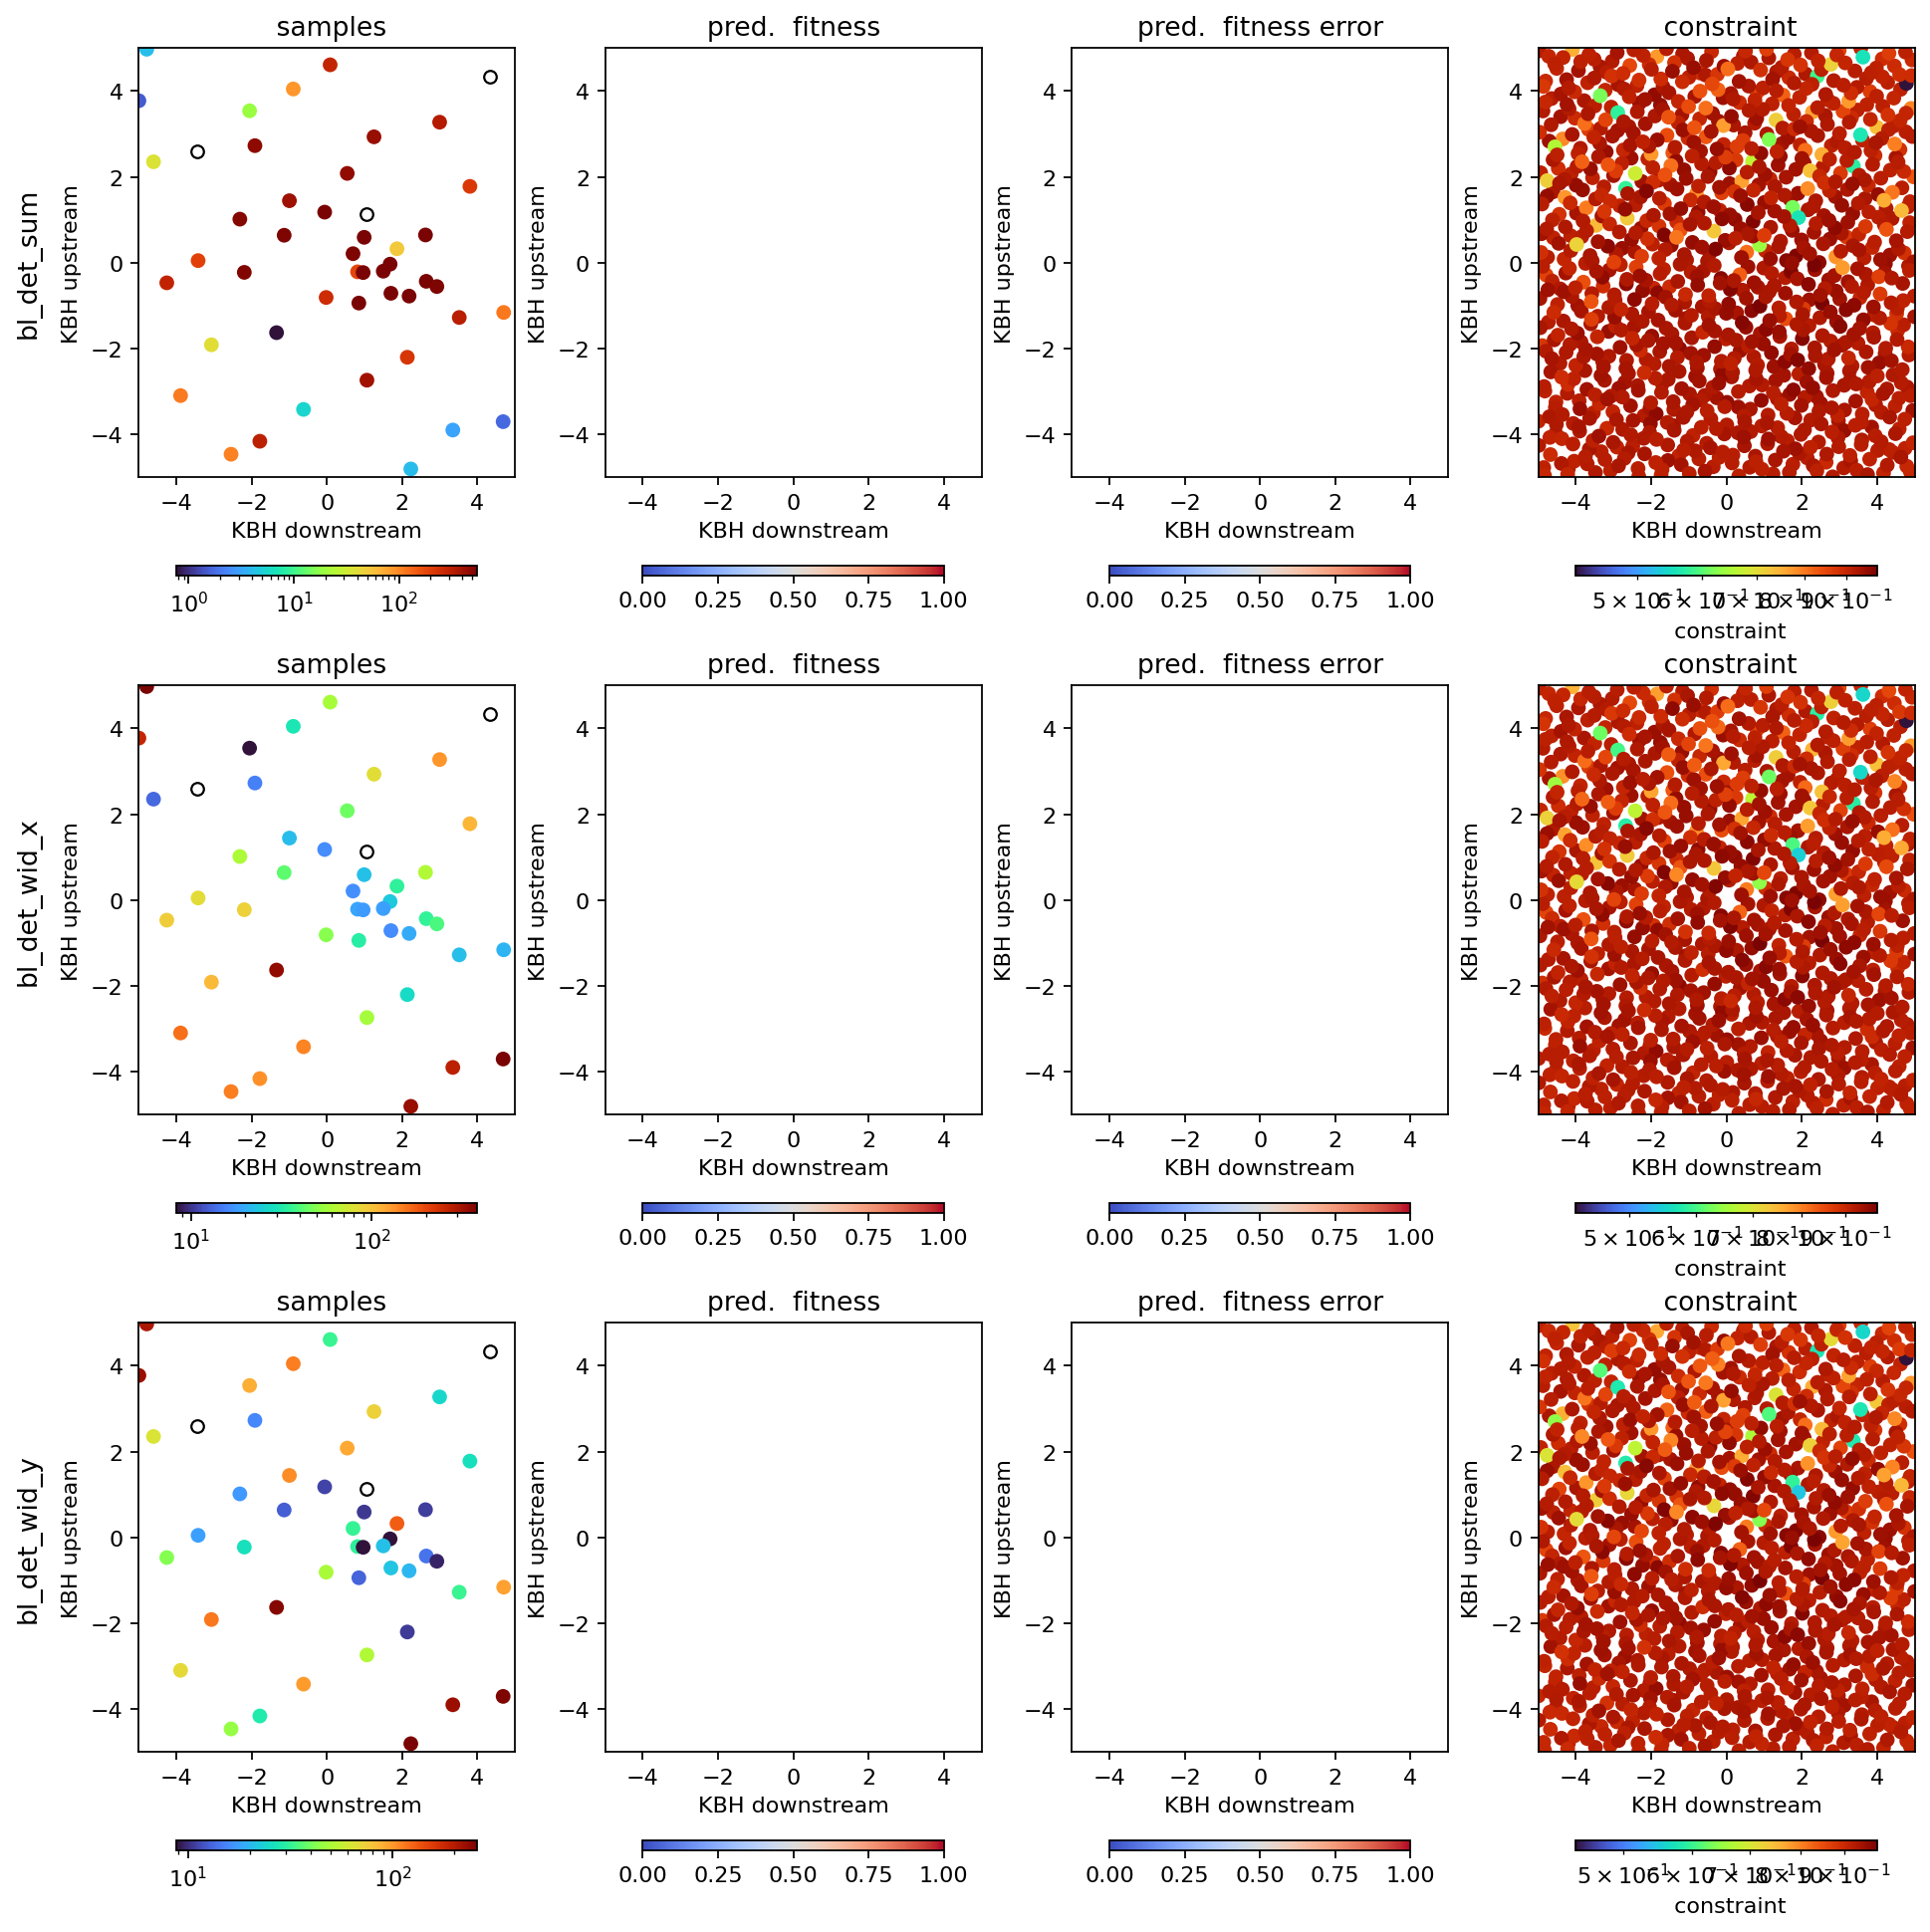

In [6]:
agent.plot_objectives(axes=(2, 3))